# imports

In [18]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix

In [19]:
# Load MNIST data using TensorFlow
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Check the shape of the loaded data
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)


Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


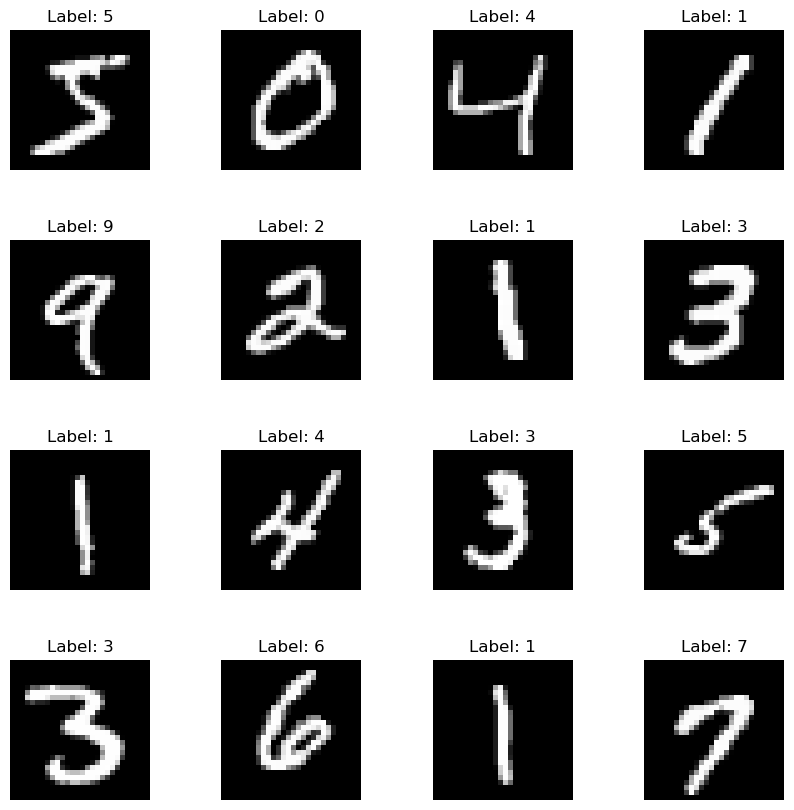

In [20]:
# Function to plot multiple digits in a grid
def plot_digits(images, labels, num_rows=4, num_cols=4):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))
    axes = axes.ravel() # convert 2D array into !D (instead of using nestd loops)
    
    for i in range(num_rows * num_cols):
        axes[i].imshow(images[i].reshape(28, 28), cmap='gray')
        axes[i].set_title(f'Label: {labels[i]}')
        axes[i].axis('off')  # Hide the axes ticks and labels
    
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.show()

# Plot the first 16 digits in the training set
plot_digits(train_images, train_labels, num_rows=4, num_cols=4)


### data preprocessing 


In [21]:
# Print a pixel value before normalization
print("Before normalization:")
print(train_images[0, 14, 14])  


Before normalization:
240


In [22]:
# Normalize pixel values between [0, 1] (so the pixel ethier black or white)
train_images = train_images / 255.0
test_images = test_images / 255.0


In [23]:
# Print a pixel value after normalization
print("After normalization:")
print(train_images[0, 14, 14])  


After normalization:
0.9411764705882353


In [24]:
# Convert labels to one-hot encoding
train_labels_categorical = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels_categorical = tf.keras.utils.to_categorical(test_labels, num_classes=10)



In [25]:
print("Original label:", train_labels[0]) 
print("One-hot encoded label:", train_labels_categorical[0])


Original label: 5
One-hot encoded label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [26]:
# Flatten the images into a 1D vector
train_images_flat = train_images.reshape((train_images.shape[0], 28 * 28))
test_images_flat = test_images.reshape((test_images.shape[0], 28 * 28))

### model bulding and trainning 

In [27]:
# Define a simple fully connected (dense) neural network
model = Sequential([
    Dense(128, activation='relu', input_shape=(28 * 28,)),  # Hidden layer with 128 units
    Dense(10, activation='softmax')  # Output layer with 10 units (one for each class)
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images_flat, train_labels_categorical, epochs=10, batch_size=32, validation_data=(test_images_flat, test_labels_categorical))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2584 - accuracy: 0.9270 - val_loss: 0.1462 - val_accuracy: 0.9560
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1155 - accuracy: 0.9657 - val_loss: 0.1025 - val_accuracy: 0.9680
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0793 - accuracy: 0.9760 - val_loss: 0.0830 - val_accuracy: 0.9745
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0588 - accuracy: 0.9819 - val_loss: 0.0756 - val_accuracy: 0.9776
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0457 - accuracy: 0.9863 - val_loss: 0.0725 - val_accuracy: 0.9776
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0367 - accuracy: 0.9885 - val_loss: 0.0807 - val_accuracy: 0.9769
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0291 - accuracy: 0.9912 - val_loss: 0.0766 - val_accuracy:

### model evaluation

In [28]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images_flat, test_labels_categorical, verbose=2)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


313/313 - 0s - loss: 0.0841 - accuracy: 0.9763 - 363ms/epoch - 1ms/step
Test accuracy: 97.63%


In [29]:
# Predict the labels of the test images
predictions = model.predict(test_images_flat)

# Convert the predictions from one-hot encoding to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Compare the first 10 predictions with the actual labels
print("Predicted labels: ", predicted_labels[:10])
print("True labels: ", test_labels[:10])


313/313 [==============================] - 0s 1ms/step
Predicted labels:  [7 2 1 0 4 1 4 9 5 9]
True labels:  [7 2 1 0 4 1 4 9 5 9]


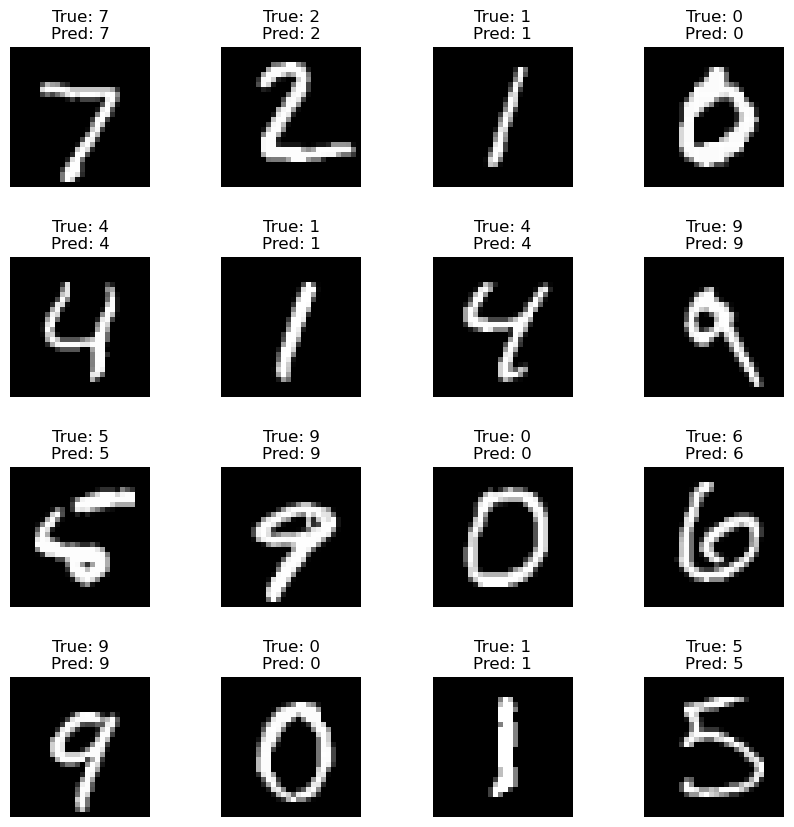

In [30]:
def plot_predictions(images, true_labels, predicted_labels, num_rows=4, num_cols=4):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))
    axes = axes.ravel()
    
    for i in range(num_rows * num_cols):
        axes[i].imshow(images[i].reshape(28, 28), cmap='gray')
        axes[i].set_title(f'True: {true_labels[i]}\nPred: {predicted_labels[i]}')
        axes[i].axis('off')
    
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.show()

# Visualize the first 16 predictions
plot_predictions(test_images, test_labels, predicted_labels)


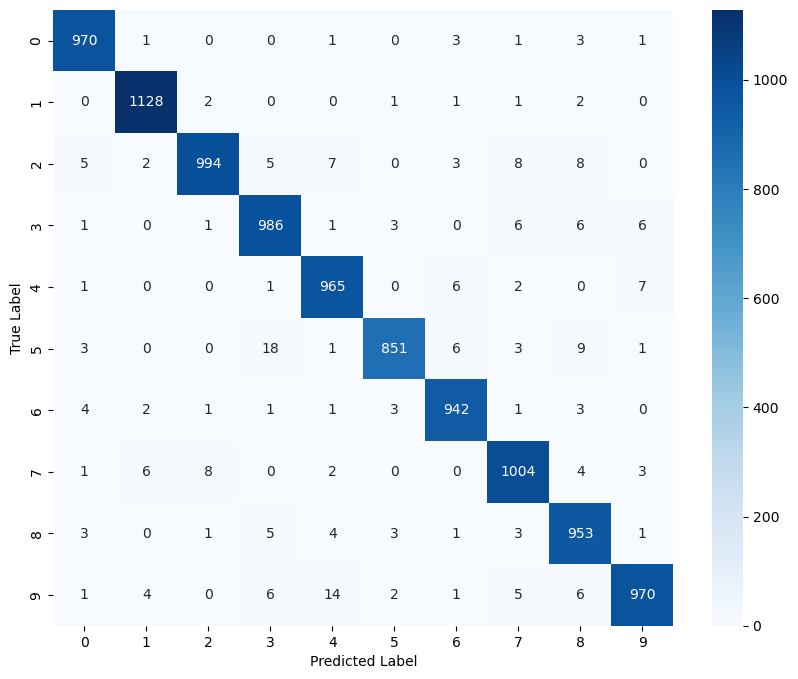

In [31]:
# Compute confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [32]:
# Find indices of false predictions
incorrect_indices = np.where(predicted_labels != test_labels)[0]


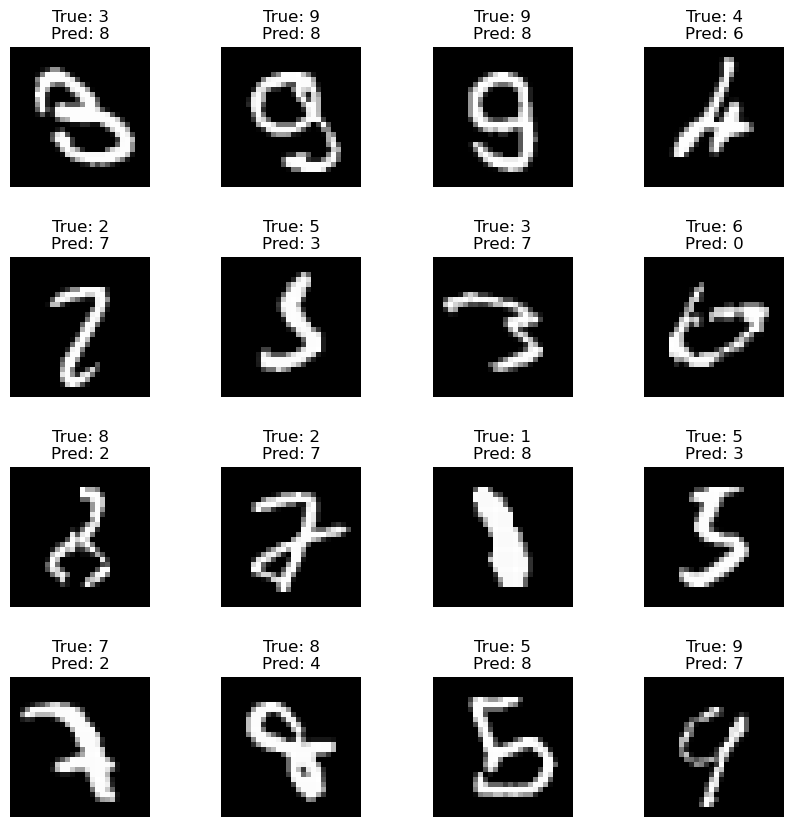

In [33]:
def plot_false_predictions(images, true_labels, predicted_labels, indices, num_rows=4, num_cols=4):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))
    axes = axes.ravel()  # Flatten the 2D array into 1D
    
    for i in range(min(num_rows * num_cols, len(indices))):
        idx = indices[i]
        axes[i].imshow(images[idx].reshape(28, 28), cmap='gray')
        axes[i].set_title(f'True: {true_labels[idx]}\nPred: {predicted_labels[idx]}')
        axes[i].axis('off')
    
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.show()

# Visualize the first 16 false predictions
plot_false_predictions(test_images, test_labels, predicted_labels, incorrect_indices)


In [34]:
# Save the trained model to a file
model.save('mnist_simple_model.h5')


C:\Users\ziadg\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
